In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from stock_data import StockData

In [2]:
stock = StockData('sp_400_midcap.csv', '662166cb8e3d13.57537943')
df = stock.fetch_all_stocks(sector='Materials', period = 'd', start = '2000-01-01', end = '2024-8-30')

In [4]:
def log_ret(s:pd.Series):
    return np.log(s / s.shift(1))

df['log_ret'] = df.groupby('ticker', group_keys=False)['adjusted_close'].apply(log_ret)

In [5]:
df = df.dropna().copy()

In [6]:
df['w'] = df.groupby('date', group_keys=False)['adjusted_close'].transform(lambda x : 1 / len(x))

In [8]:
equal_w_index = df.groupby('date').apply(lambda x: x['log_ret']@x['w'])

<Axes: xlabel='date'>

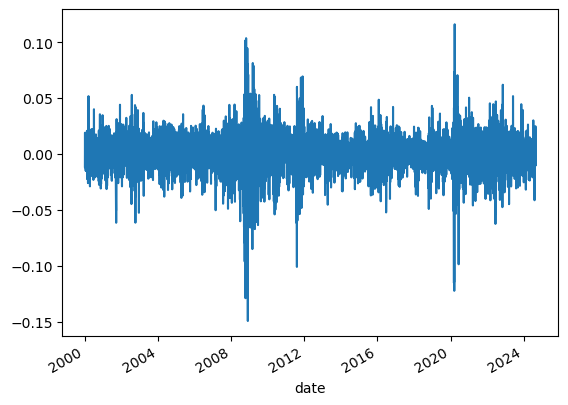

In [9]:
equal_w_index.plot()

In [14]:
n = len(equal_w_index)
training = int(n * 0.8)
training_set = equal_w_index[:training].index
testing_set = equal_w_index[training:].index

In [23]:
print(training_set.shape)
training_set[-1]

(4963,)


Timestamp('2019-09-25 00:00:00')

In [24]:
print(testing_set.shape)
testing_set[0]

(1241,)


Timestamp('2019-09-26 00:00:00')